In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
# Read and copy the file for analysis
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
# Check if any missing part
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# Learn the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


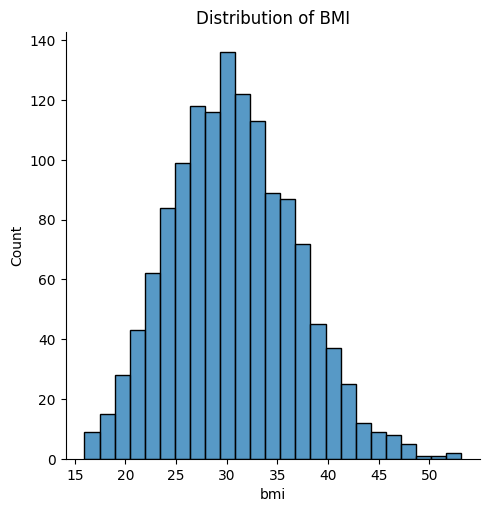

In [19]:
import seaborn as sns
sns.displot(x="bmi",data=df).set(title='Distribution of BMI');

Underweight: BMI is less than 18.5
Normal weight: BMI is 18.5 to 24.9
Overweight: BMI is 25 to 29.9
Obese: BMI is 30 or more

dataset mostly have obesity

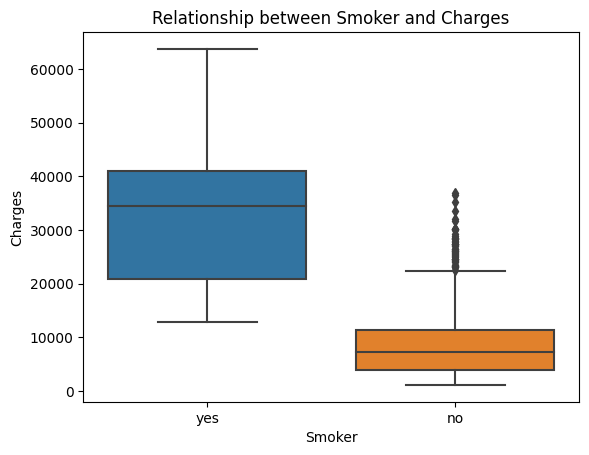

In [20]:
import matplotlib.pyplot as plt
plt.figure()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

People who don't smoke have lower medical costs.

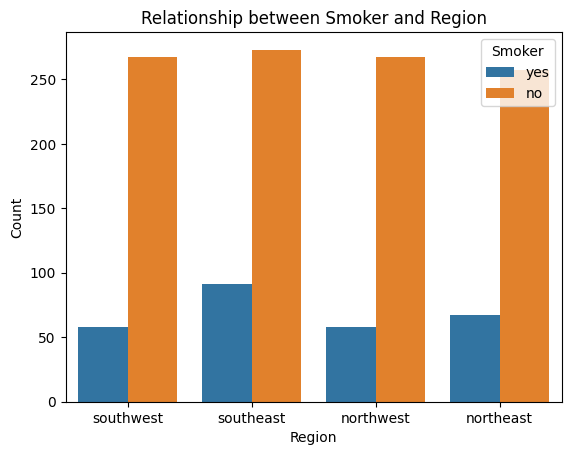

In [21]:
plt.figure()
sns.countplot(x='region', hue='smoker', data=df)
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.show()

People in the east region smoke more than those in the north.

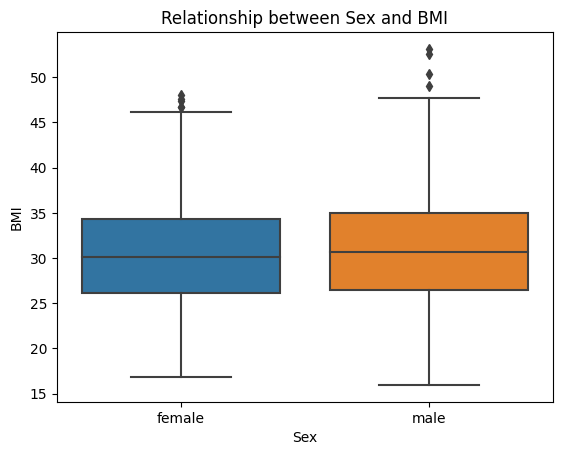

In [22]:
plt.figure()
sns.boxplot(x='sex', y='bmi', data=df)
plt.title("Relationship between Sex and BMI")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

The average BMI for males is slightly higher than that for females.

In [23]:
most_children_region = df.groupby('region')['children'].sum().idxmax()

print("Region with the most children:", most_children_region)

Region with the most children: southeast


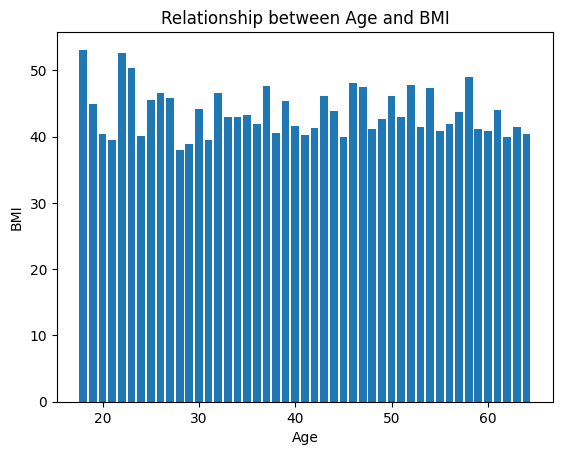

In [24]:
plt.figure()
plt.bar(df['age'], df['bmi'])
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

There is not any distinct relation between age and BMI.

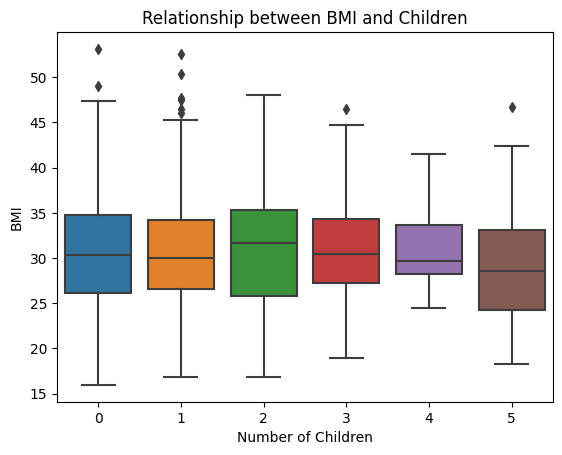

In [25]:
plt.figure()
sns.boxplot(x='children', y='bmi', data=df)
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()

There is not any distinct relation between number of children and BMI.

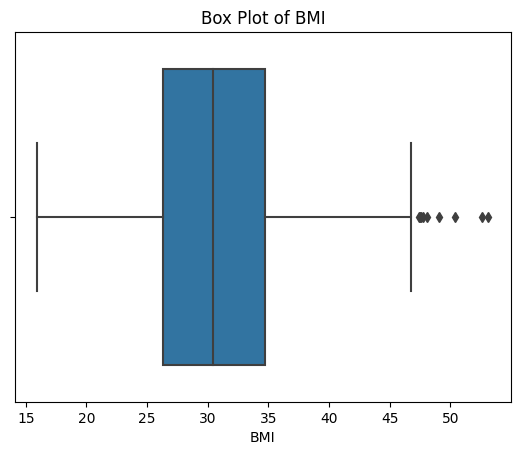

In [26]:
plt.figure()
sns.boxplot(x=df['bmi'])
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.show()

The majority of the dataset has BMIs between 25 and 35, with some anomalies occurring after the age of 45.

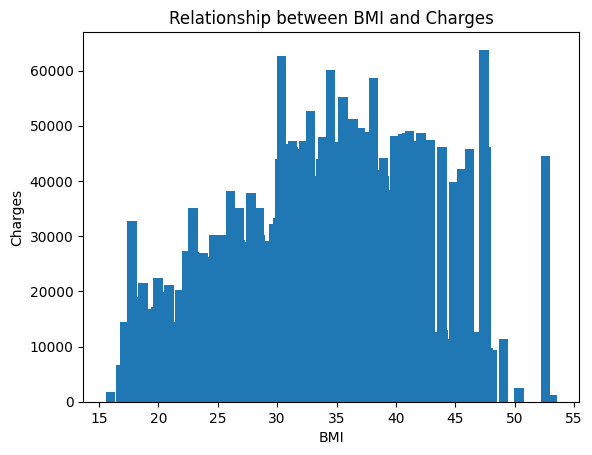

In [27]:
plt.figure()
plt.bar(df['bmi'], df['charges'])
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

BMI and charges are in direct relation other than some anomalies.

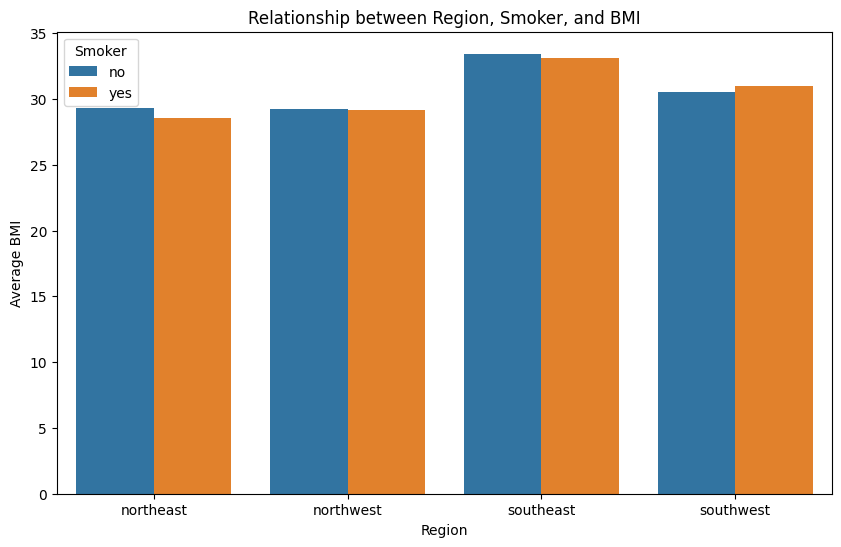

In [28]:
grouped_data = df.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='region', y='bmi', hue='smoker')
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("Average BMI")
plt.legend(title="Smoker")
plt.show()

The highest BMIs occur most frequently in the southeast region, and there isn't a significant relationship between smoking and BMI.

In [29]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].astype('category')


# Assigning numerical values and storing it in another columns
df['sex_new'] = df['sex'].cat.codes
df['region_new'] = df['region'].cat.codes
df['smoker_new'] = df['smoker'].cat.codes


# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    df[['sex_new', 'region_new', 'smoker_new']]).toarray())

# Merge with main
New_df = df.join(enc_data)

print(New_df)

      age     sex     bmi  children smoker     region      charges  sex_new  \
0      19  female  27.900         0    yes  southwest  16884.92400        0   
1      18    male  33.770         1     no  southeast   1725.55230        1   
2      28    male  33.000         3     no  southeast   4449.46200        1   
3      33    male  22.705         0     no  northwest  21984.47061        1   
4      32    male  28.880         0     no  northwest   3866.85520        1   
...   ...     ...     ...       ...    ...        ...          ...      ...   
1333   50    male  30.970         3     no  northwest  10600.54830        1   
1334   18  female  31.920         0     no  northeast   2205.98080        0   
1335   18  female  36.850         0     no  southeast   1629.83350        0   
1336   21  female  25.800         0     no  southwest   2007.94500        0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0   

      region_new  smoker_new    0    1    2    3   

In [38]:
df_encoded = pd.get_dummies(df, columns=["sex", "region", "smoker"], drop_first=True)


In [40]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [41]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Select regression models
linear_regression_model = LinearRegression()
ridge_regression_model = Ridge()
decision_tree_regression_model = DecisionTreeRegressor()
random_forest_regression_model = RandomForestRegressor()
gradient_boosting_regression_model = GradientBoostingRegressor()

# Train regression models
linear_regression_model.fit(X_train_scaled, y_train)
ridge_regression_model.fit(X_train_scaled, y_train)
decision_tree_regression_model.fit(X_train_scaled, y_train)
random_forest_regression_model.fit(X_train_scaled, y_train)
gradient_boosting_regression_model.fit(X_train_scaled, y_train)



GradientBoostingRegressor()

In [42]:
from sklearn.metrics import mean_squared_error

# Predict on the training set
y_train_pred_linear = linear_regression_model.predict(X_train_scaled)
y_train_pred_ridge = ridge_regression_model.predict(X_train_scaled)
y_train_pred_decision_tree = decision_tree_regression_model.predict(X_train_scaled)
y_train_pred_random_forest = random_forest_regression_model.predict(X_train_scaled)
y_train_pred_gradient_boosting = gradient_boosting_regression_model.predict(X_train_scaled)

# Calculate MSE for training predictions
mse_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_decision_tree = mean_squared_error(y_train, y_train_pred_decision_tree)
mse_random_forest = mean_squared_error(y_train, y_train_pred_random_forest)
mse_gradient_boosting = mean_squared_error(y_train, y_train_pred_gradient_boosting)

# Print the MSE for each model
print("MSE - Linear Regression:", mse_linear)
print("MSE - Ridge Regression:", mse_ridge)
print("MSE - Decision Tree Regression:", mse_decision_tree)
print("MSE - Random Forest Regression:", mse_random_forest)
print("MSE - Gradient Boosting Regression:", mse_gradient_boosting)


MSE - Linear Regression: 37312099.25134876
MSE - Ridge Regression: 37277717.68460702
MSE - Decision Tree Regression: 244239.5543823394
MSE - Random Forest Regression: 3605905.9416756867
MSE - Gradient Boosting Regression: 14432515.321972046


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define regression models
models = [
    LinearRegression(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Create a custom scorer for cross-validation (negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation and evaluate models
results = {}
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scorer)
    results[str(model)] = -scores.mean()  # Convert negative MSE back to positive for better interpretation

# Print the cross-validation results
for model, score in results.items():
    print(f"{model}: Mean MSE = {score:.2f}")

# Choose the best performing model
best_model = min(results, key=results.get)
print("\nBest performing model:", best_model)


LinearRegression(): Mean MSE = 37976301.92
Ridge(): Mean MSE = 37946665.43
DecisionTreeRegressor(): Mean MSE = 43872363.81
RandomForestRegressor(): Mean MSE = 24527471.48
GradientBoostingRegressor(): Mean MSE = 22352945.43

Best performing model: GradientBoostingRegressor()


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],   # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size at each iteration
    'max_depth': [3, 4, 5]             # Maximum depth of individual regression estimators
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best negative MSE:", -grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best negative MSE: 21632519.518091436


In [45]:
from sklearn.metrics import r2_score

# Predict on the test set
y_test_pred = grid_search.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_test_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.8796976856834863
